In [1]:
# Imports
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
excel = pd.ExcelFile("src/data/European attitudes towards energy policies_SP555_VOL_A.xlsx")
print(excel.sheet_names)

#excel= data.iloc[8:]
#print(excel)
#print(data.iloc[5])


['Content', 'B', 'QC1', 'QC2', 'QC2T', 'QC3_1', 'QC3_2', 'QC3_3', 'QC3_4', 'QC3_5', 'QC4a', 'QC4b', 'QC4T', 'QC5a', 'QC5b', 'QC5T', 'QC6', 'QC7', 'QC8_1', 'QC8_2', 'QC8_3', 'QC9', 'QC9a', 'QC9b', 'QC10', 'QC10T', 'QC11', 'QC11T', 'QC12', 'QC12T', 'D15a', 'D15a_2', 'C14', 'D15b', 'D15b_2', 'SD28', 'SD29', 'D11', 'D11R', 'D7', 'D7R', 'D8', 'D8c', 'D10', 'D25', 'D40a', 'D40b', 'D40c', 'D40', 'D40R', 'D60', 'D62_1', 'D62_2', 'D62_3', 'D62_4', 'D62R', 'D63', 'D70', 'D70a', 'D1', 'D1_2', 'D1_3', 'D71_1', 'D71_2', 'D71_3', 'C2', 'D78', 'D73_1', 'D73_2', 'D73_3', 'SD18a', 'SD18b', 'D72_1', 'D72_2', 'SD20']


In [3]:
# read specific sheet, without columns set, since column names change in the sheet
QC1 = pd.read_excel(excel, sheet_name="QC3_1", header=None)

# QUESTIONS FILTERING
QC1_questions = QC1.iloc[8:, 1:2].reset_index(drop=True)
rows_to_drop = [0,2]  # The 10th row becomes index 1 after slicing
QC1_questions = QC1_questions.drop(index=rows_to_drop).reset_index(drop=True)
QC1_questions_eng = QC1_questions.iloc[::2].reset_index(drop=True) # drop every second row (french questions)
QC1_questions_eng = QC1_questions_eng.drop(index=0).reset_index(drop=True) # drop total values row
print(QC1_questions.columns)
print("QC1_questions English Shape:", QC1_questions_eng.shape)
print("QC1_questions English:", QC1_questions_eng)

# DATA FILTERING
QC1_data = QC1.iloc[8:, 2:].reset_index(drop=True)
#print(QC1_data.iloc[0:3,:])
QC1_data = QC1_data.drop(index=2).reset_index(drop=True) #NaN values
#print(QC1_data.iloc[0])
QC1_data.columns = QC1_data.iloc[0]
QC1_data = QC1_data[1:].reset_index(drop=True)
QC1_data_percent = QC1_data.iloc[::2].reset_index(drop=True) # drop every second row (absoute values)
QC1_data_percent = QC1_data_percent.drop(index=0).reset_index(drop=True) # drop total values row
QC1_data_percent.replace("-", 0, inplace=True)
#print(QC1_data.columns)
print("QC1_data percentages shape:",QC1_data_percent.shape)
print("QC1_data percentages:", QC1_data_percent)
#print(QC1_data["UE27\nEU27"])


Index([1], dtype='int64')
QC1_questions English Shape: (8, 1)
QC1_questions English:                                  1
0                    Totally agree
1                    Tend to agree
2                 Tend to disagree
3                 Totally disagree
4  Prefer not to say (SPONTANEOUS)
5                       Don't know
6                    Total 'Agree'
7                 Total 'Disagree'
QC1_data percentages shape: (8, 30)
QC1_data percentages: 0  UE27\nEU27    BE    BG    CZ    DK   D-W    DE   D-E    EE    IE  ...  \
0        0.31  0.29  0.24  0.17  0.45  0.38  0.35  0.23  0.16  0.44  ...   
1        0.50  0.58  0.47  0.43  0.40  0.45  0.46  0.48  0.43  0.42  ...   
2        0.11  0.09  0.11  0.22  0.08  0.11  0.12  0.16  0.20  0.04  ...   
3        0.04  0.02  0.06  0.13  0.04  0.03  0.04  0.06  0.11  0.04  ...   
4        0.00  0.00  0.01  0.00  0.00  0.01  0.01  0.00  0.02  0.01  ...   
5        0.04  0.02  0.11  0.05  0.03  0.02  0.02  0.07  0.08  0.05  ...   
6        0

/var/folders/yn/gbsz0bts6ws2gtr_26s_nd6h0000gn/T/ipykernel_57986/2068237664.py:23: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  QC1_data_percent.replace("-", 0, inplace=True)


In [4]:

QC1_df = pd.concat([QC1_questions_eng, QC1_data_percent], axis=1)
QC1_df = QC1_df.rename(columns={QC1_df.columns[0]: "Question"})
QC1_df


,Question,UE27\nEU27,BE,BG,CZ,DK,D-W,DE,D-E,EE,...,MT,NL,AT,PL,PT,RO,SI,SK,FI,SE
0,Totally agree,0.31,0.29,0.24,0.17,0.45,0.38,0.35,0.23,0.16,...,0.59,0.50,0.36,0.24,0.34,0.22,0.30,0.22,0.44,0.53
1,Tend to agree,0.50,0.58,0.47,0.43,0.40,0.45,0.46,0.48,0.43,...,0.36,0.37,0.45,0.56,0.53,0.52,0.46,0.57,0.41,0.36
2,Tend to disagree,0.11,0.09,0.11,0.22,0.08,0.11,0.12,0.16,0.20,...,0.03,0.07,0.10,0.12,0.05,0.16,0.15,0.14,0.10,0.06
3,Totally disagree,0.04,0.02,0.06,0.13,0.04,0.03,0.04,0.06,0.11,...,0.02,0.06,0.05,0.05,0.01,0.03,0.07,0.03,0.03,0.04
4,Prefer not to say (SPONTANEOUS),0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.02,...,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00
5,Don't know,0.04,0.02,0.11,0.05,0.03,0.02,0.02,0.07,0.08,...,0.00,0.00,0.03,0.03,0.07,0.06,0.02,0.04,0.02,0.01
6,Total 'Agree',0.81,0.87,0.71,0.60,0.85,0.83,0.81,0.71,0.59,...,0.95,0.87,0.81,0.80,0.87,0.74,0.76,0.79,0.85,0.89
7,Total 'Disagree',0.15,0.11,0.17,0.35,0.12,0.14,0.16,0.22,0.31,...,0.05,0.13,0.15,0.17,0.06,0.19,0.22,0.17,0.13,0.10


# PCA of Questions

(8, 2)


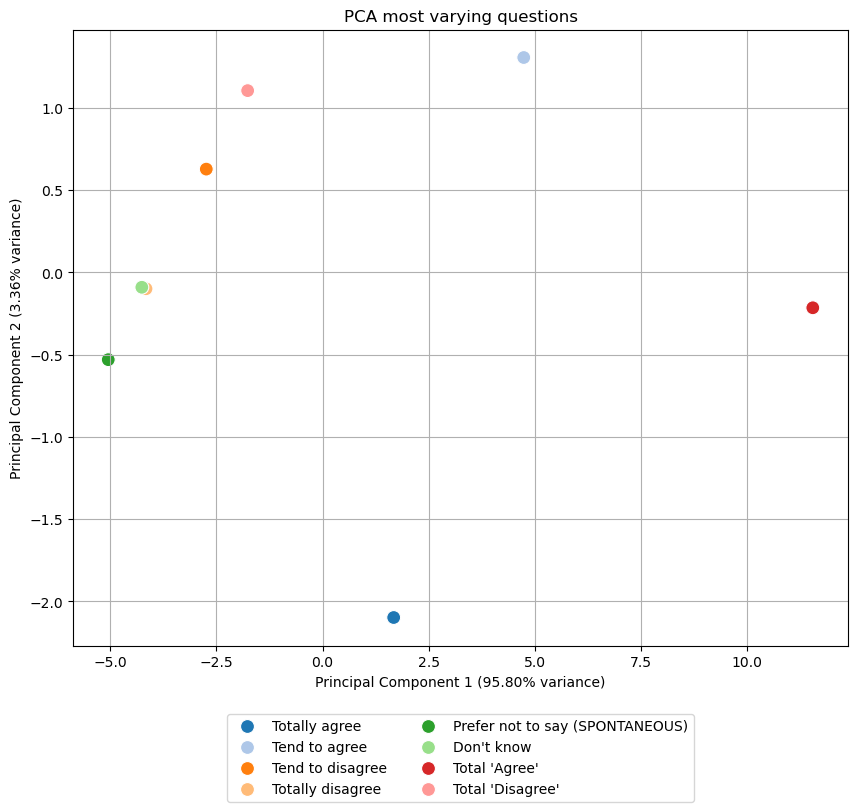

In [ ]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(QC1_data_percent)

# Apply PCA
pca = PCA(n_components=2)  # Top 2 components for simplicity
pca_result = pca.fit_transform(data_scaled)
print(pca_result.shape)
#print(pca_result)

# Create a DataFrame with the results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])

# Add the questions back to the PCA dataframe
pca_df["Question"] = QC1_df["Question"]

#pca_df.to_csv("PCA_Questions")

# Plot the biplot
plt.figure(figsize=(10, 8))

# Plot the countries as points
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Question"], palette="tab20", s=100)

# Add labels and title
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA most varying questions")
plt.grid(True)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.show()

# PCA of Countries

(30, 2)


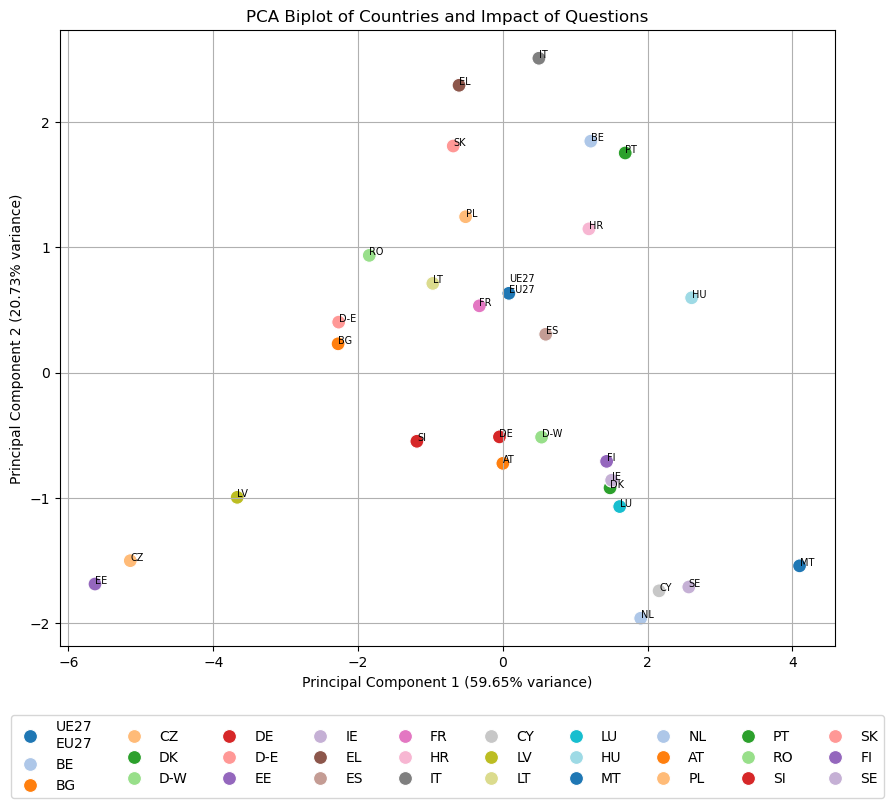

In [6]:
# Standardize the data
QC1_data_percent_trans = QC1_data_percent.T
scaler = StandardScaler()
data_scaled = scaler.fit_transform(QC1_data_percent_trans)

# Apply PCA
pca = PCA(n_components=2)  
pca_result = pca.fit_transform(data_scaled)
print(pca_result.shape)
#print(pca_result)

# Create a DataFrame with the results
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
pca_df["Countries"] = QC1_data_percent.columns

#pca_df.to_csv("PCA_Countries")

plt.figure(figsize=(10, 8))

# Plot the countries as points
sns.scatterplot(x=pca_df["PC1"], y=pca_df["PC2"], hue=pca_df["Countries"], palette="tab20", s=100)

# Add labels and title
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.title("PCA Biplot of Countries and Impact of Questions")
plt.grid(True)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=10)
for i in range(pca_df.shape[0]):
    plt.text(pca_df["PC1"][i], pca_df["PC2"][i], pca_df["Countries"][i], fontsize=7)
plt.show()